In [1]:
# See the dataset folder in linux-lab:
! ls /home/zulkar/Dropbox/gits/data/ThOpt/master/

ls: /home/zulkar/Dropbox/gits/data/ThOpt/master/: No such file or directory


In [2]:
# Control variables: 

# master dataset location:
master_location = 'Dropbox/gits/data/ThOpt/master/'

# master file name : 
master_file_name = 'master_06_29_2016_15_00'


In [3]:
# import pandas library:
import os
import pandas as pds
import pylab as pyl
import numpy as np
from scipy.interpolate import *
%matplotlib inline

In [4]:
# pretty dataframe :
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
# required values :

# OS file seperator: 
file_seperator = os.sep


# User OS home directory:
user_home = os.environ['HOME']
user_home = user_home+file_seperator
user_home

'/Users/mds/'

In [6]:
# read the master file : 
full_master_file_path = user_home + master_location + master_file_name
data = pds.read_csv(full_master_file_path)
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
0,652486,3293,128,0.25,4194304,1,1,1,0,48.360560,42.371396,2015-07-24 00:05:45,Evenstar,Didclab-ws10
1,652486,3293,128,0.25,4194304,1,1,2,0,56.777687,36.089951,2015-07-24 00:06:27,Evenstar,Didclab-ws10
2,652486,3293,128,0.25,4194304,1,1,4,0,62.801374,32.628335,2015-07-24 00:07:03,Evenstar,Didclab-ws10
3,652486,3293,128,0.25,4194304,1,1,8,0,76.870653,26.656531,2015-07-24 00:07:36,Evenstar,Didclab-ws10
4,652486,3293,128,0.25,4194304,1,1,16,0,79.185026,25.877430,2015-07-24 00:08:03,Evenstar,Didclab-ws10


In [7]:
# as first five columns are data transfer requests. we can convert them into string for accurate and 
# efficient indexing. 

data['file_size'] = data['file_size'].astype(str)
data['number_of_files'] = data['number_of_files'].astype(str)
data['bandwidth'] = data['bandwidth'].astype(str)
data['rtt'] = data['rtt'].astype(str)
data['buffer_size'] = data['buffer_size'].astype(str)
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
0,652486,3293,128,0.25,4194304,1,1,1,0,48.360560,42.371396,2015-07-24 00:05:45,Evenstar,Didclab-ws10
1,652486,3293,128,0.25,4194304,1,1,2,0,56.777687,36.089951,2015-07-24 00:06:27,Evenstar,Didclab-ws10
2,652486,3293,128,0.25,4194304,1,1,4,0,62.801374,32.628335,2015-07-24 00:07:03,Evenstar,Didclab-ws10
3,652486,3293,128,0.25,4194304,1,1,8,0,76.870653,26.656531,2015-07-24 00:07:36,Evenstar,Didclab-ws10
4,652486,3293,128,0.25,4194304,1,1,16,0,79.185026,25.877430,2015-07-24 00:08:03,Evenstar,Didclab-ws10


In [8]:
# get the unique transfers : as tuple 
transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers[0:5]
#len(unique_transfers)

[('652486', '3293', '128', '0.25', '4194304'),
 ('10623021', '405', '128', '0.25', '4194304'),
 ('51421866', '126', '128', '0.25', '4194304'),
 ('912680960', '10', '128', '0.25', '4194304'),
 ('3131997', '3429', '1280', '80.0', '33554432')]

In [9]:
# function : get_unique_source_destination(dataframe, columns_list)
def get_unique_values(temp_df):
    
    # drop duplicate entries:
    drop_duplicate_items = temp_df.drop_duplicates()
    
    # get the unique items as tuples:
    unique_items = [tuple(items) for items in drop_duplicate_items.values]
    return unique_items

In [10]:
# get the unique destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
source_destination_name = data[['source','destination']]
droped_duplicate_sources_destinations = source_destination_name.drop_duplicates()

unique_source_destination = [tuple(sources_destinations) for sources_destinations in droped_duplicate_sources_destinations.values]
unique_source_destination

[('Evenstar', 'Didclab-ws10'),
 ('Blacklight', 'Trestles'),
 ('Stampede', 'Gordon/Oasis'),
 ('Stampede', 'Blacklight')]

In [11]:
# make (file_size, number_of_files, bandwidth, rtt, buffer_size) index 
# d = data.set_index(['source','destination','start_time','file_size','number_of_files','bandwidth','rtt','buffer_size','p','cc','pp','fast'])
d = data.set_index(['source','destination'])
d.head()

file_size number_of_files bandwidth   rtt buffer_size  \
source   destination                                                          
Evenstar Didclab-ws10    652486            3293       128  0.25     4194304   
         Didclab-ws10    652486            3293       128  0.25     4194304   
         Didclab-ws10    652486            3293       128  0.25     4194304   
         Didclab-ws10    652486            3293       128  0.25     4194304   
         Didclab-ws10    652486            3293       128  0.25     4194304   

                       p  cc  pp  fast  throughput       time  \
source   destination                                            
Evenstar Didclab-ws10  1   1   1     0   48.360560  42.371396   
         Didclab-ws10  1   1   2     0   56.777687  36.089951   
         Didclab-ws10  1   1   4     0   62.801374  32.628335   
         Didclab-ws10  1   1   8     0   76.870653  26.656531   
         Didclab-ws10  1   1  16     0   79.185026  25.877430   

                                start_time  
source   destination                        
Evenstar Didclab-ws10  2015-07-24 00:05:45  
         Didclab-ws10  2015-07-24 00:06:27  
         Didclab-ws10  2015-07-24 00:07:03  
         Didclab-ws10  2015-07-24 00:07:36  
         Didclab-ws10  2015-07-24 00:08:03

In [12]:
r = data.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r.head()

p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
652486    3293            128       0.25 4194304      1   1   1     0   
                                         4194304      1   1   2     0   
                                         4194304      1   1   4     0   
                                         4194304      1   1   8     0   
                                         4194304      1   1  16     0   

                                                      throughput       time  \
file_size number_of_files bandwidth rtt  buffer_size                          
652486    3293            128       0.25 4194304       48.360560  42.371396   
                                         4194304       56.777687  36.089951   
                                         4194304       62.801374  32.628335   
                                         4194304       76.870653  26.656531   
                                         4194304       79.185026  25.877430   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
652486    3293            128       0.25 4194304      2015-07-24 00:05:45   
                                         4194304      2015-07-24 00:06:27   
                                         4194304      2015-07-24 00:07:03   
                                         4194304      2015-07-24 00:07:36   
                                         4194304      2015-07-24 00:08:03   

                                                        source   destination  
file_size number_of_files bandwidth rtt  buffer_size                          
652486    3293            128       0.25 4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10  
                                         4194304      Evenstar  Didclab-ws10

In [13]:
h = r.loc[('209715259', '69', '1280', '39.0', '49920000')]
h.head()

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':


p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
209715259 69              1280      39.0 49920000     1   1   1     0   
                                         49920000     1   1   1     1   
                                         49920000     1   1   2     0   
                                         49920000     1   1   2     1   
                                         49920000     1   1   4     0   

                                                      throughput        time  \
file_size number_of_files bandwidth rtt  buffer_size                           
209715259 69              1280      39.0 49920000      47.266001  291.964704   
                                         49920000      55.589452  248.248604   
                                         49920000      63.238233  218.222477   
                                         49920000      47.229179  292.192334   
                                         49920000      53.472254  258.077842   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
209715259 69              1280      39.0 49920000     2016-05-20 11:28:00   
                                         49920000     2016-05-20 11:32:00   
                                         49920000     2016-05-20 11:36:00   
                                         49920000     2016-05-20 11:41:00   
                                         49920000     2016-05-20 11:45:00   

                                                        source   destination  
file_size number_of_files bandwidth rtt  buffer_size                          
209715259 69              1280      39.0 49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis

In [14]:
# filter specific columns from data:
h1 = r.loc[('104857668', '299', '1280', '39.0', '49920000')]
p1 = h1.sort_values('throughput')
p1.tail(4)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app


p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                     
104857668 299             1280      39.0 49920000      8  32   1     0   
                                         49920000     32  16   8     1   
                                         49920000      8  32   4     0   
                                         49920000     32  16   8     0   

                                                      throughput       time  \
file_size number_of_files bandwidth rtt  buffer_size                          
104857668 299             1280      39.0 49920000     731.041026  40.900604   
                                         49920000     739.935649  40.408946   
                                         49920000     746.124336  40.073776   
                                         49920000     780.620068  38.302909   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
104857668 299             1280      39.0 49920000     2016-05-23 17:43:00   
                                         49920000     2016-05-23 20:46:00   
                                         49920000     2016-05-23 17:45:00   
                                         49920000     2016-05-23 20:45:00   

                                                        source   destination  
file_size number_of_files bandwidth rtt  buffer_size                          
104857668 299             1280      39.0 49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis  
                                         49920000     Stampede  Gordon/Oasis

In [15]:
data.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
0,652486,3293,128,0.25,4194304,1,1,1,0,48.360560,42.371396,2015-07-24 00:05:45,Evenstar,Didclab-ws10
1,652486,3293,128,0.25,4194304,1,1,2,0,56.777687,36.089951,2015-07-24 00:06:27,Evenstar,Didclab-ws10
2,652486,3293,128,0.25,4194304,1,1,4,0,62.801374,32.628335,2015-07-24 00:07:03,Evenstar,Didclab-ws10
3,652486,3293,128,0.25,4194304,1,1,8,0,76.870653,26.656531,2015-07-24 00:07:36,Evenstar,Didclab-ws10
4,652486,3293,128,0.25,4194304,1,1,16,0,79.185026,25.877430,2015-07-24 00:08:03,Evenstar,Didclab-ws10


# Query : Get all the file transfers in XSEDE nodes:

In [16]:
## Approach - 1:
# copy main data into a temporary variable :
temp_data = data.copy(deep=True)
temp_data.head()

# define the XSEDE nodes:
XSEDE_source_destination = [('Blacklight', 'Trestles'),
 ('Stampede', 'Gordon/Oasis'),
 ('Stampede', 'Blacklight')]
XSEDE_source_destination

# set source and destination as index:
r = temp_data.set_index(['source','destination'])
r.head()

# Get the data with source = Stampede and destination = Gordon or Gordon/Oasis
#for items in XSEDE_source_destination:
xsede = []
k = 1
for item in XSEDE_source_destination:
    part = r.loc[item]
    if k == 1:
        xsede = part
    else :
        xsede = pds.concat([xsede, part], axis = 0)
    k = k + 1
    del part
xsede.head()


# reset index: 
# reset the index:
xsede = xsede.reset_index(['source','destination'])
# reordering the columns inside the dataframe:
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
            'p', 'cc', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
xsede = xsede[column_order]
xsede.head()

# test xsede_large contain correct data:

#temp_df = xsede_large[['source','destination']]
#unique_large = get_unique_values(temp_df)
#del temp_data
#unique_large

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.


,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
0,3131997,3429,1280,80.0,33554432,1,1,1,0,25.187269,406.637939,2015-03-31 00:57:22,Blacklight,Trestles
1,3131997,3429,1280,80.0,33554432,1,1,2,0,35.116388,291.661520,2015-03-31 00:04:09,Blacklight,Trestles
2,3131997,3429,1280,80.0,33554432,1,1,4,0,23.076415,443.834042,2015-03-31 00:09:01,Blacklight,Trestles
3,3131997,3429,1280,80.0,33554432,1,1,8,0,32.948817,310.848773,2015-03-31 00:16:25,Blacklight,Trestles
4,3131997,3429,1280,80.0,33554432,1,1,16,0,42.757196,239.540963,2015-03-31 00:21:35,Blacklight,Trestles


In [17]:
# added: zulkar: Sep 1, 16 3:13m
# DBScan clustering: 
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

Automatically created module for IPython interactive environment


In [18]:
cluster_data = xsede[['file_size','number_of_files','throughput']]
cluster_data.shape

(86288, 3)

In [19]:
cluster_data['file_size'] = cluster_data['file_size'].astype(int)
fs = cluster_data.file_size.as_matrix()
fs = fs /1000000
fs

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([   3.131997,    3.131997,    3.131997, ...,  130.884019,
        130.884019,  130.884019])

In [20]:
cluster_data['number_of_files'] = cluster_data['number_of_files'].astype(int)
nd = cluster_data.number_of_files.as_matrix()
cluster_data['throughput'] = cluster_data['throughput'].astype(float)
th = cluster_data.throughput.as_matrix()


/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Sub-divide the xsede transfers into large, small and medium:

In [21]:
# get all the large files from xsede data: 
# get the logs with filesize greater than 250MB. 
filesize_filter_large = ((xsede.file_size.astype(int) >= (200*1000*1000))  )
xsede_large = xsede[filesize_filter_large]
xsede_large.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
648,3063322383,34,1280,80.0,33554432,1,1,1,0,19.862434,5000.797314,2015-04-04 00:49:22,Blacklight,Trestles
649,3063322383,34,1280,80.0,33554432,1,1,2,0,19.861540,5001.022274,2015-04-04 00:12:43,Blacklight,Trestles
650,3063322383,34,1280,80.0,33554432,1,1,4,0,19.862387,5000.809055,2015-04-04 00:36:04,Blacklight,Trestles
651,3063322383,34,1280,80.0,33554432,1,1,8,0,43.515512,2282.588478,2015-04-04 00:59:25,Blacklight,Trestles
652,3063322383,34,1280,80.0,33554432,1,1,16,0,28.359249,3502.490611,2015-04-04 00:37:27,Blacklight,Trestles


In [22]:
# get the logs with filesize in between 50MB and 250MB. 
filesize_filter_medium = ((xsede.file_size.astype(int) <= (200*1000*1000)) & ( xsede.file_size.astype(int) >= (45*1000*1000) ) )
xsede_medium = xsede[filesize_filter_medium]
xsede_medium.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
432,132236763,325,1280,80.0,33554432,1,1,1,0,31.764421,1290.311992,2015-04-02 00:39:40,Blacklight,Trestles
433,132236763,325,1280,80.0,33554432,1,1,2,0,30.418342,1347.411133,2015-04-02 00:01:10,Blacklight,Trestles
434,132236763,325,1280,80.0,33554432,1,1,4,0,37.903374,1081.328882,2015-04-02 00:23:37,Blacklight,Trestles
435,132236763,325,1280,80.0,33554432,1,1,8,0,8.194537,5001.626433,2015-04-02 00:41:39,Blacklight,Trestles
436,132236763,325,1280,80.0,33554432,1,1,16,0,8.194232,5001.812230,2015-04-02 00:05:00,Blacklight,Trestles


In [23]:
# get the logs with filesize in between 50MB and 250MB. 
filesize_filter_small = ((xsede.file_size.astype(int) <= (40*1000*1000))  )
xsede_small = xsede[filesize_filter_small]
xsede_small.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
0,3131997,3429,1280,80.0,33554432,1,1,1,0,25.187269,406.637939,2015-03-31 00:57:22,Blacklight,Trestles
1,3131997,3429,1280,80.0,33554432,1,1,2,0,35.116388,291.661520,2015-03-31 00:04:09,Blacklight,Trestles
2,3131997,3429,1280,80.0,33554432,1,1,4,0,23.076415,443.834042,2015-03-31 00:09:01,Blacklight,Trestles
3,3131997,3429,1280,80.0,33554432,1,1,8,0,32.948817,310.848773,2015-03-31 00:16:25,Blacklight,Trestles
4,3131997,3429,1280,80.0,33554432,1,1,16,0,42.757196,239.540963,2015-03-31 00:21:35,Blacklight,Trestles


In [24]:
# Get the data with source Stampede and Gordon:
xsede_large_st_gr = xsede[(xsede_large.source == 'Stampede') & (xsede_large.destination == 'Gordon/Oasis')]
xsede_large_st_gr.head()

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


IndexingError: Unalignable boolean Series key provided

In [26]:
# Create graphs for XSEDE large files : 
xsede_medium.head()

,file_size,number_of_files,bandwidth,rtt,buffer_size,p,cc,pp,fast,throughput,time,start_time,source,destination
432,132236763,325,1280,80.0,33554432,1,1,1,0,31.764421,1290.311992,2015-04-02 00:39:40,Blacklight,Trestles
433,132236763,325,1280,80.0,33554432,1,1,2,0,30.418342,1347.411133,2015-04-02 00:01:10,Blacklight,Trestles
434,132236763,325,1280,80.0,33554432,1,1,4,0,37.903374,1081.328882,2015-04-02 00:23:37,Blacklight,Trestles
435,132236763,325,1280,80.0,33554432,1,1,8,0,8.194537,5001.626433,2015-04-02 00:41:39,Blacklight,Trestles
436,132236763,325,1280,80.0,33554432,1,1,16,0,8.194232,5001.812230,2015-04-02 00:05:00,Blacklight,Trestles


In [27]:
# get the unique transfers : 
# get the unique transfers : as tuple 
transfer_requests = xsede_medium[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers_large = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers_large

[('132236763', '325', '1280', '80.0', '33554432'),
 ('104857664', '64', '1280', '40.0', '33554432'),
 ('130884019', '329', '1280', '40.0', '33554432'),
 ('104857659', '69', '1280', '39.0', '49920000'),
 ('104857741', '29', '1280', '39.0', '49920000'),
 ('104857641', '99', '1280', '39.0', '49920000'),
 ('104857683', '49', '1280', '39.0', '49920000'),
 ('104857815', '19', '1280', '39.0', '49920000'),
 ('104857661', '199', '1280', '39.0', '49920000'),
 ('104857705', '39', '1280', '39.0', '49920000'),
 ('104857668', '299', '1280', '39.0', '49920000')]

In [28]:
# Get 3GB 8 transfer request:
# set request param as index:
r_medium = xsede_medium.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r_medium.head()

p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
132236763 325             1280      80.0 33554432     1   1   1     0   
                                         33554432     1   1   2     0   
                                         33554432     1   1   4     0   
                                         33554432     1   1   8     0   
                                         33554432     1   1  16     0   

                                                      throughput         time  \
file_size number_of_files bandwidth rtt  buffer_size                            
132236763 325             1280      80.0 33554432      31.764421  1290.311992   
                                         33554432      30.418342  1347.411133   
                                         33554432      37.903374  1081.328882   
                                         33554432       8.194537  5001.626433   
                                         33554432       8.194232  5001.812230   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
132236763 325             1280      80.0 33554432     2015-04-02 00:39:40   
                                         33554432     2015-04-02 00:01:10   
                                         33554432     2015-04-02 00:23:37   
                                         33554432     2015-04-02 00:41:39   
                                         33554432     2015-04-02 00:05:00   

                                                          source destination  
file_size number_of_files bandwidth rtt  buffer_size                          
132236763 325             1280      80.0 33554432     Blacklight    Trestles  
                                         33554432     Blacklight    Trestles  
                                         33554432     Blacklight    Trestles  
                                         33554432     Blacklight    Trestles  
                                         33554432     Blacklight    Trestles

In [29]:
# same operations for 100MB with 64 files dataset:
l_100MB_64 = r_medium.loc[('104857664', '64', '1280', '40.0', '33554432')]
l_100MB_64.head()

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  from ipykernel import kernelapp as app


p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
104857664 64              1280      40.0 33554432     1   1   1     1   
                                         33554432     1   1   1     0   
                                         33554432     1   1   2     1   
                                         33554432     1   1   4     1   
                                         33554432     1   1   4     0   

                                                      throughput        time  \
file_size number_of_files bandwidth rtt  buffer_size                           
104857664 64              1280      40.0 33554432     139.691700   45.815259   
                                         33554432      62.012022  103.205902   
                                         33554432      94.532597   67.701626   
                                         33554432     171.529367   37.311452   
                                         33554432      60.514904  105.759175   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
104857664 64              1280      40.0 33554432     2014-11-05 19:36:04   
                                         33554432     2014-11-05 19:36:50   
                                         33554432     2014-11-05 19:38:33   
                                         33554432     2014-11-05 19:42:35   
                                         33554432     2014-11-05 19:43:12   

                                                        source   destination  
file_size number_of_files bandwidth rtt  buffer_size                          
104857664 64              1280      40.0 33554432     Stampede  Gordon/Oasis  
                                         33554432     Stampede  Gordon/Oasis  
                                         33554432     Stampede  Gordon/Oasis  
                                         33554432     Stampede  Gordon/Oasis  
                                         33554432     Stampede  Gordon/Oasis

# Analysis : bitonic sequence 

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

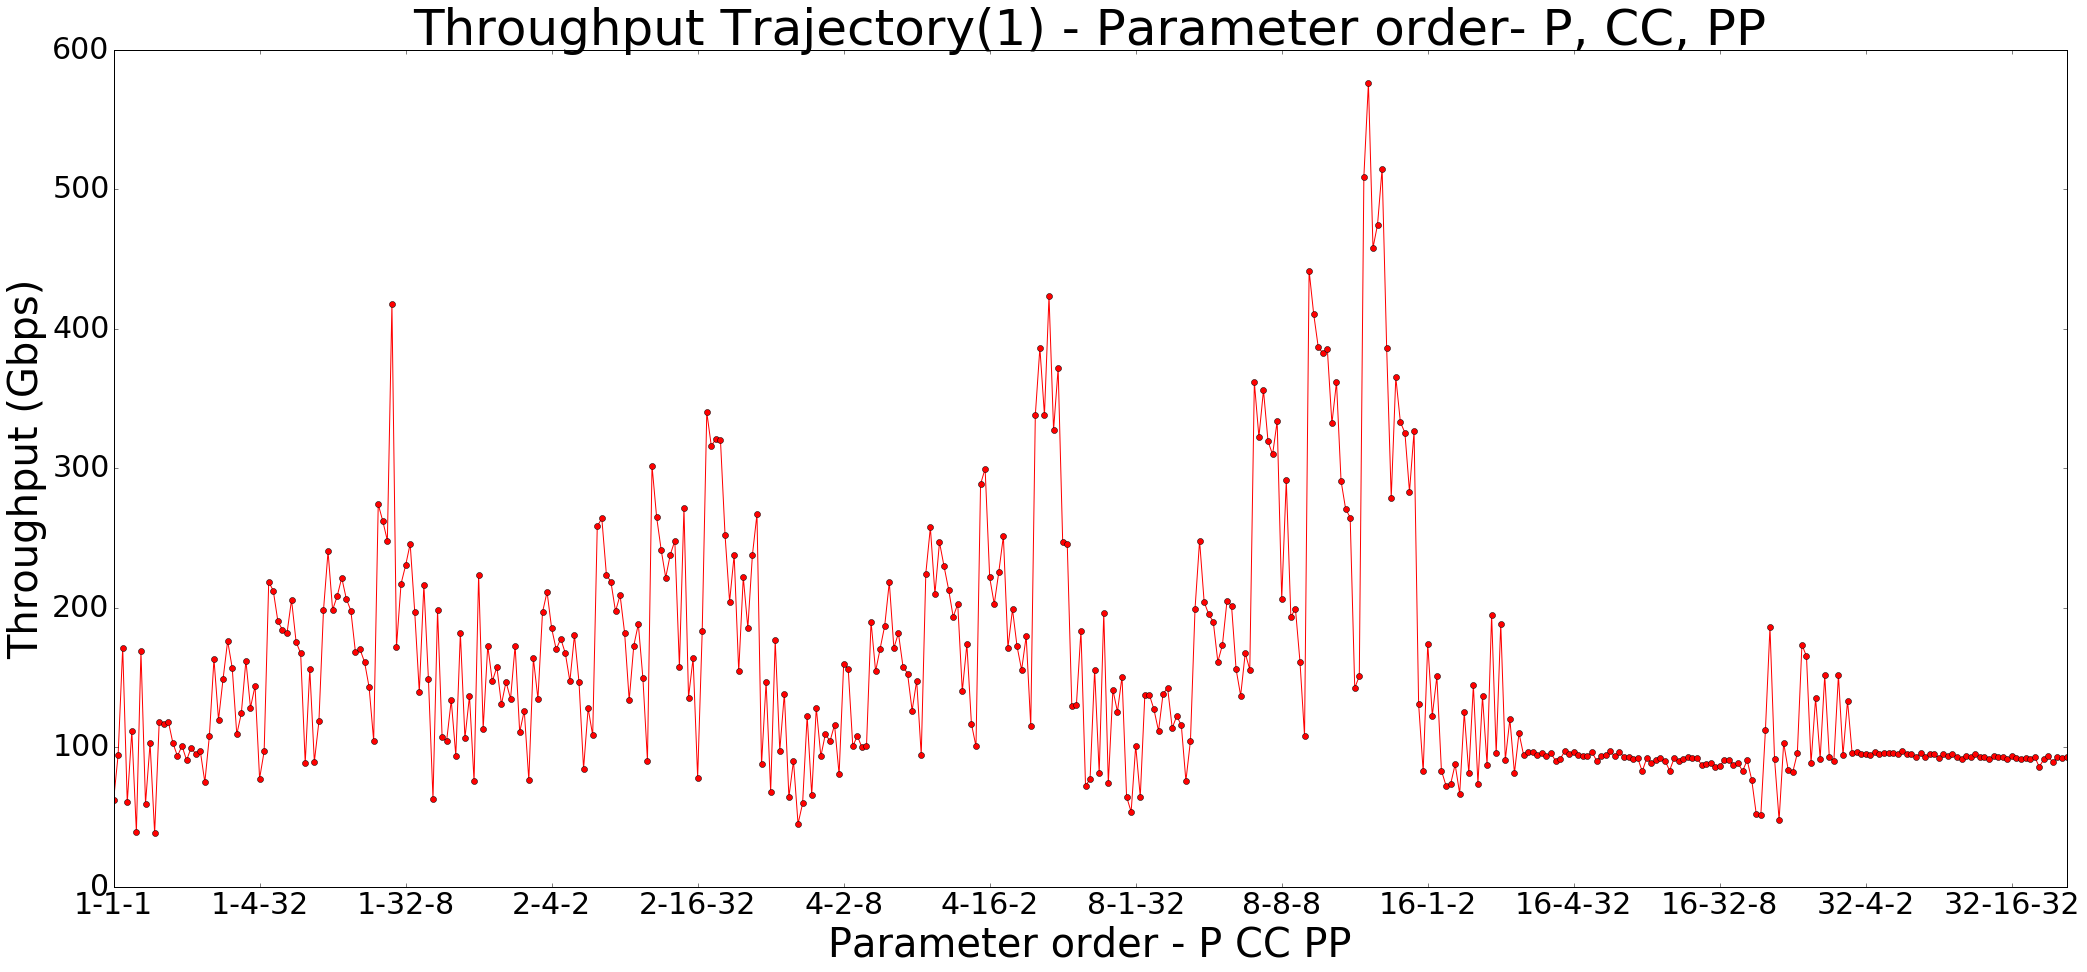

In [31]:
# Figure with lexicographical order : p, cc, pp 
run0 = l_100MB_64[1:430]
# Plot your graph:

run1 = run0.copy(deep=True)
run1['ticks'] = run1.p.astype(str) + '-' + run1.cc.astype(str) + '-' + run1.pp.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run1.throughput)
y_value.shape
tick_value = np.array(run1.ticks)
plt.figure(figsize=(35,15))
plt.xlabel('Parameter order - P CC PP', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(1) - Parameter order- P, CC, PP', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


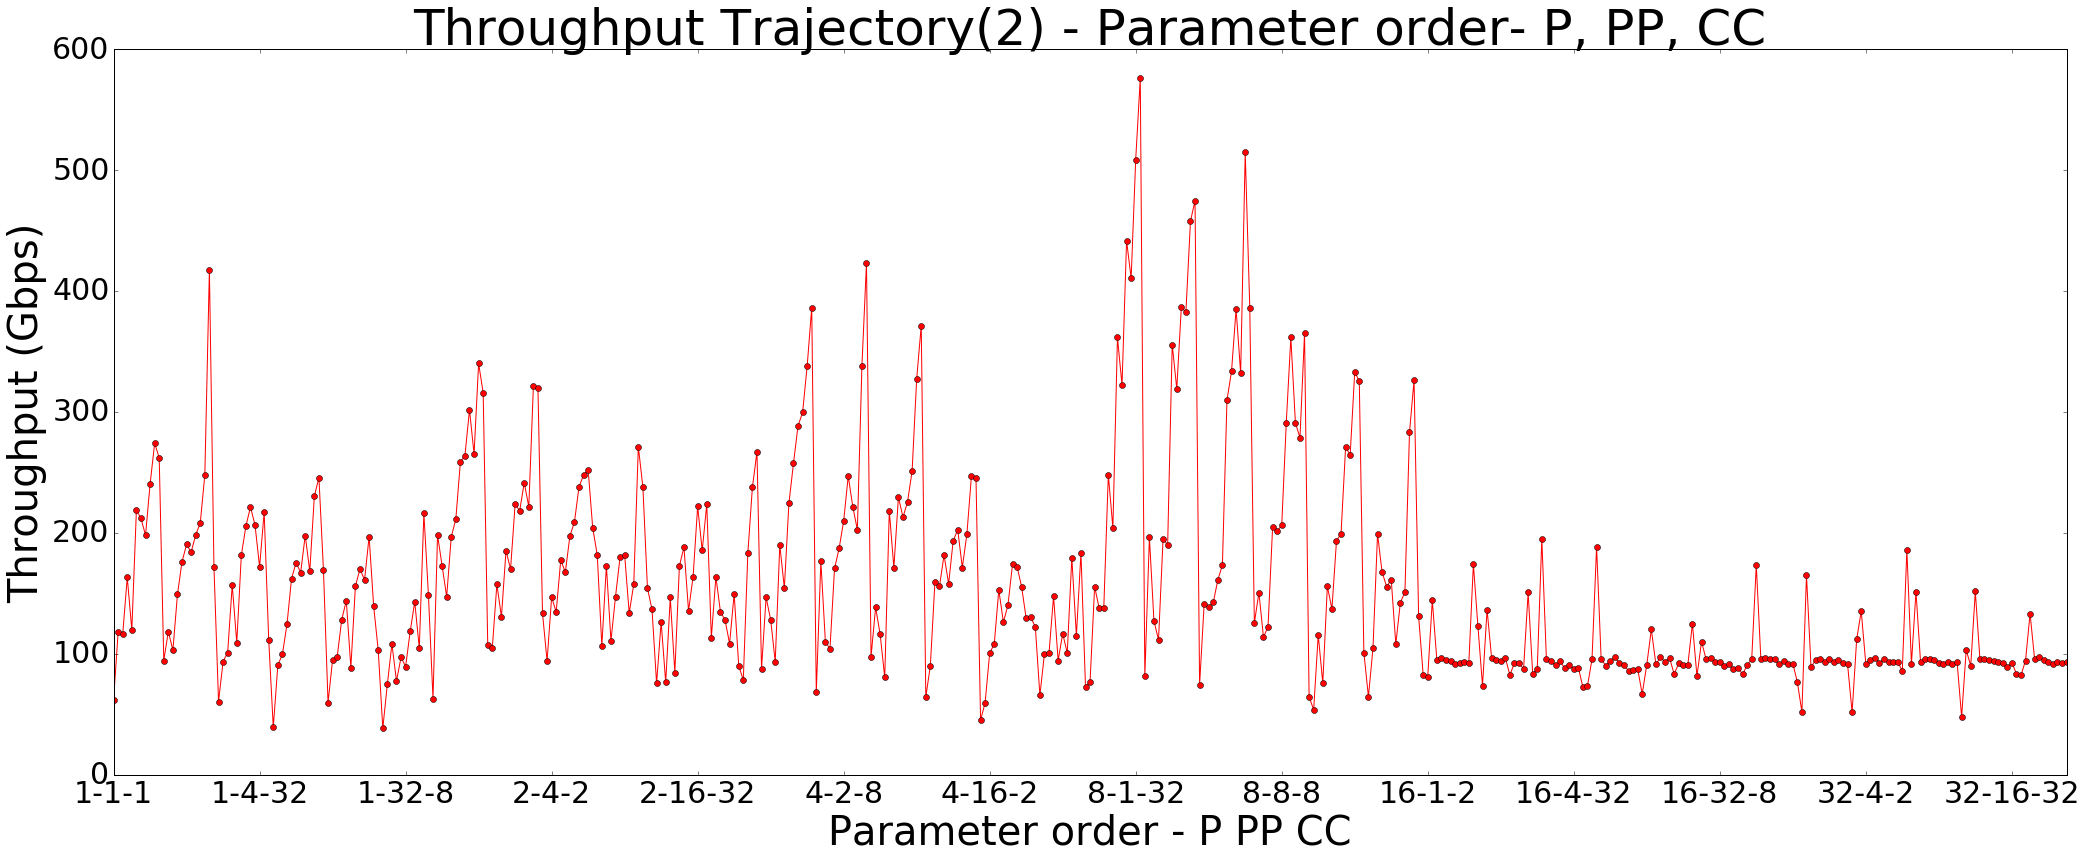

In [32]:
# Figure with lexicographical order : p, pp, cc 
run2 = run0.copy(deep=True)
run2 = run2.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run2 = run2.sort(['p','pp','cc'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'p', 'pp', 'cc', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run2 = run2[column_order]

# plot the graph:

run2['ticks'] = run2.p.astype(str) + '-' + run2.pp.astype(str) + '-' + run2.cc.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run2.throughput)
y_value.shape
tick_value = np.array(run2.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - P PP CC', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(2) - Parameter order- P, PP, CC', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


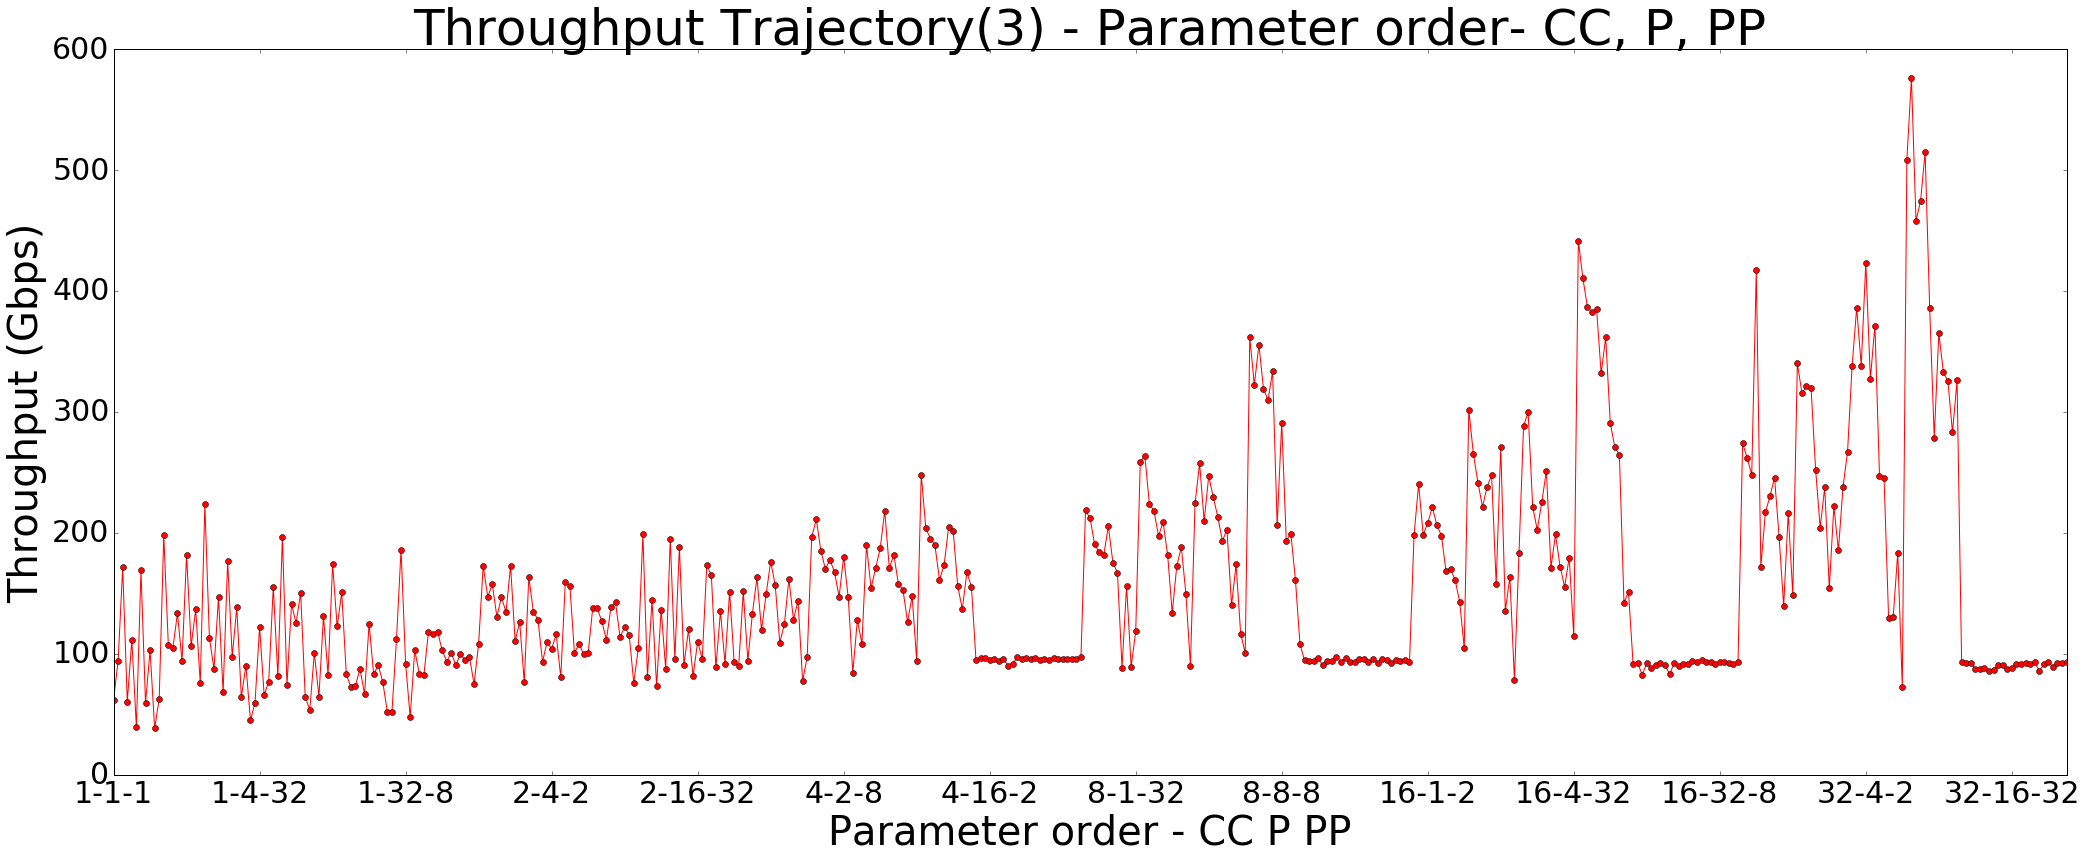

In [33]:
# Figure with lexicographical order : cc, p, pp 
run3 = run0.copy(deep=True)
run3 = run3.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run3 = run3.sort(['cc','p','pp'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'p', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run3 = run3[column_order]

# plot the graph:

run3['ticks'] = run3.cc.astype(str) + '-' + run3.p.astype(str) + '-' + run3.pp.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run3.throughput)
y_value.shape
tick_value = np.array(run3.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - CC P PP', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(3) - Parameter order- CC, P, PP', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


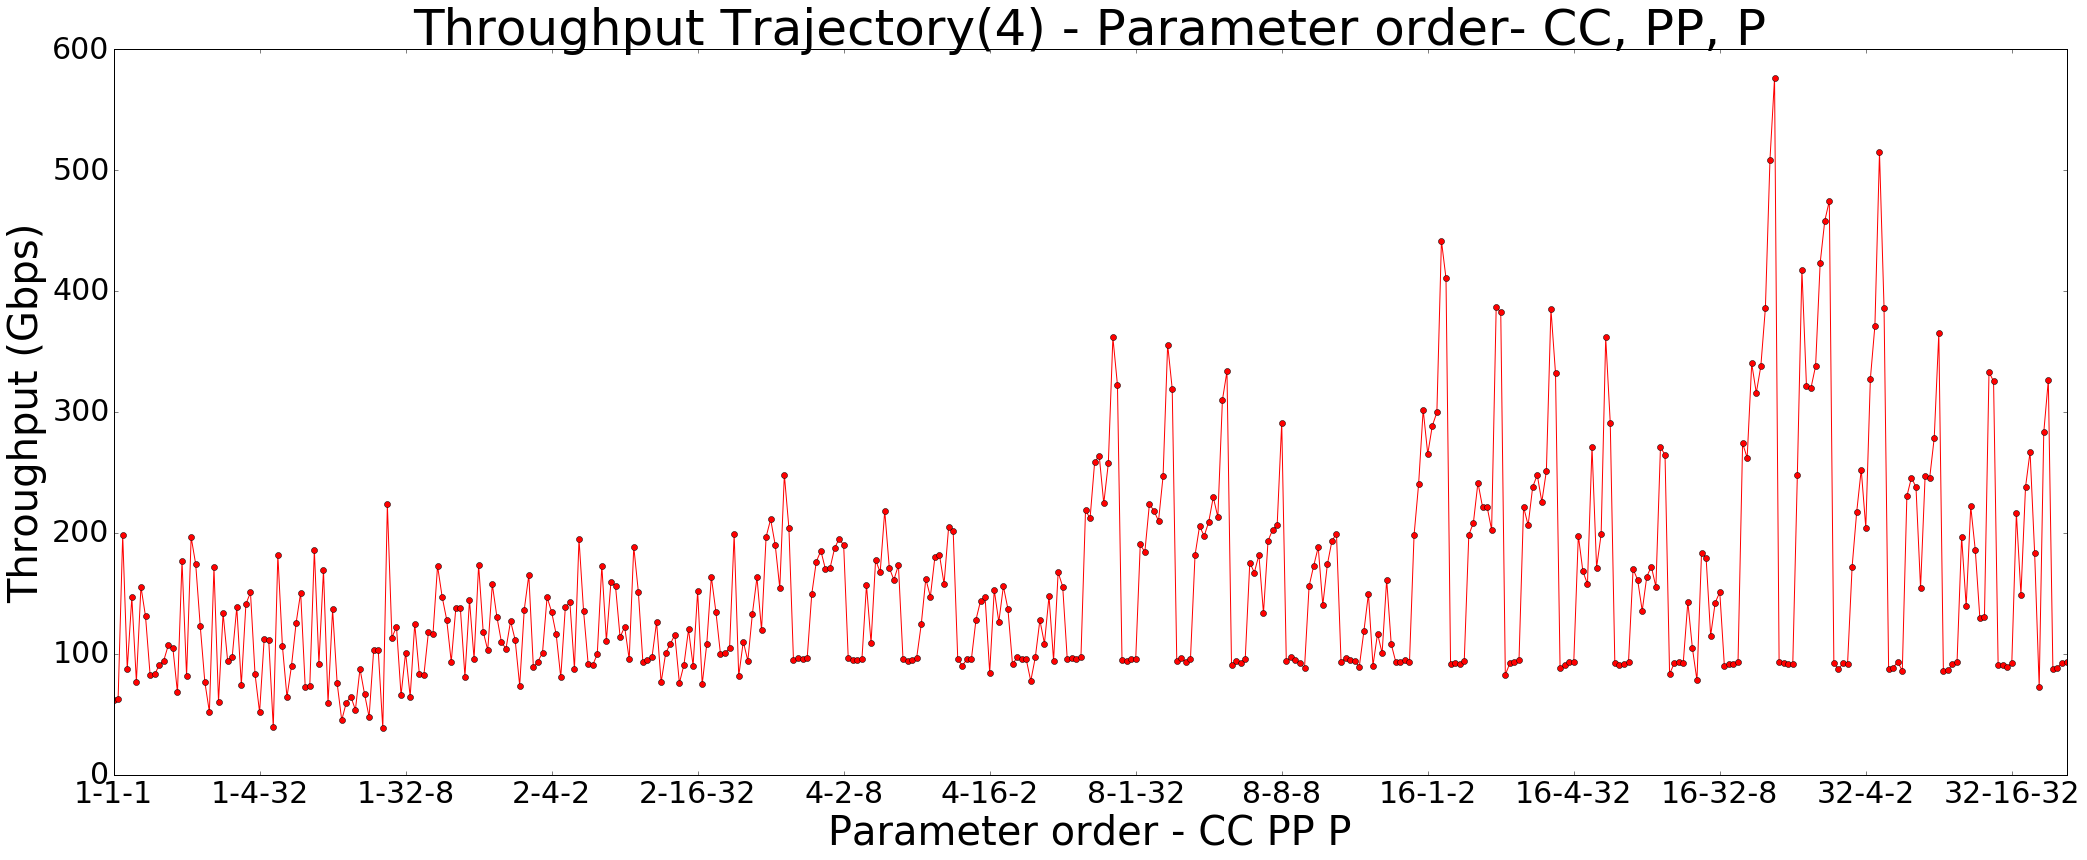

In [34]:
# Figure with lexicographical order : cc, pp, p 
run4 = run0.copy(deep=True)
run4 = run4.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run4 = run4.sort(['cc','pp','p'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'cc', 'pp', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run4 = run4[column_order]

# plot the graph:

run4['ticks'] = run4.cc.astype(str) + '-' + run4.pp.astype(str) + '-' + run4.p.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run4.throughput)
y_value.shape
tick_value = np.array(run4.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - CC PP P', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(4) - Parameter order- CC, PP, P', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


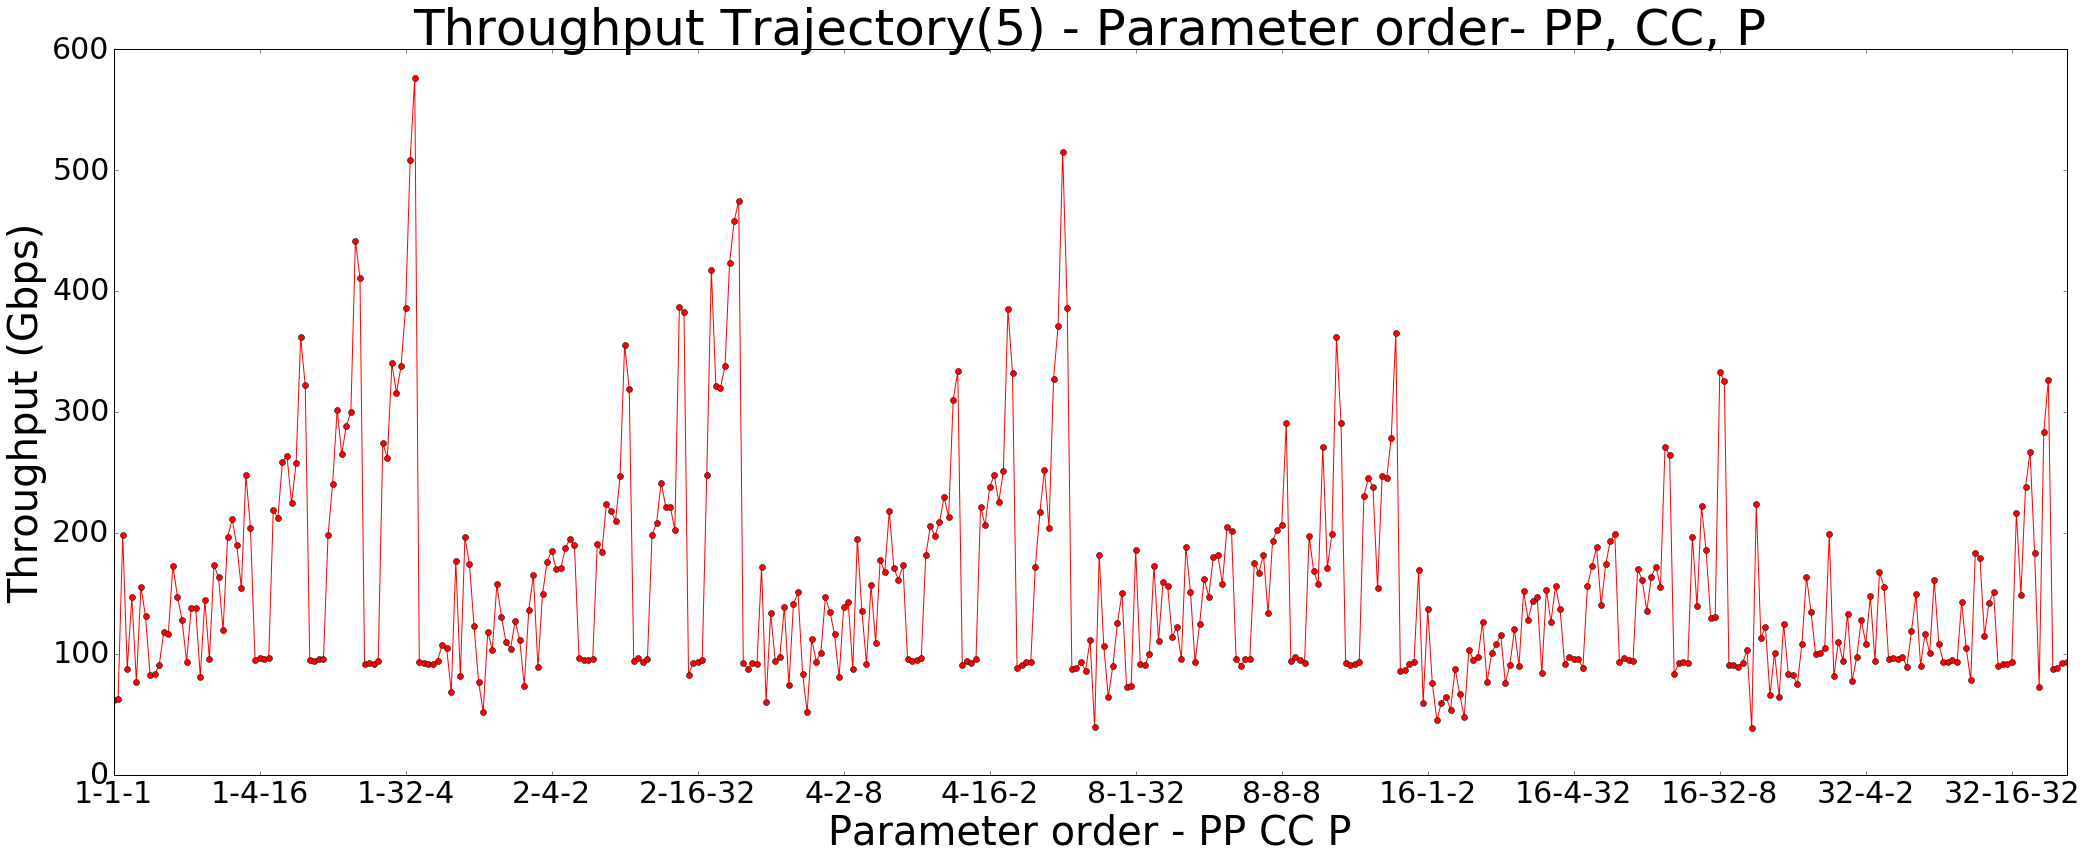

In [35]:
# Figure with lexicographical order : pp, cc, p 
run5 = run0.copy(deep=True)
run5 = run5.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run5 = run5.sort(['pp','cc','p'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run5 = run5[column_order]

# plot the graph:

run5['ticks'] = run5.pp.astype(str) + '-' + run5.cc.astype(str) + '-' + run5.p.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run5.throughput)
y_value.shape
tick_value = np.array(run5.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - PP CC P', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(5) - Parameter order- PP, CC, P', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


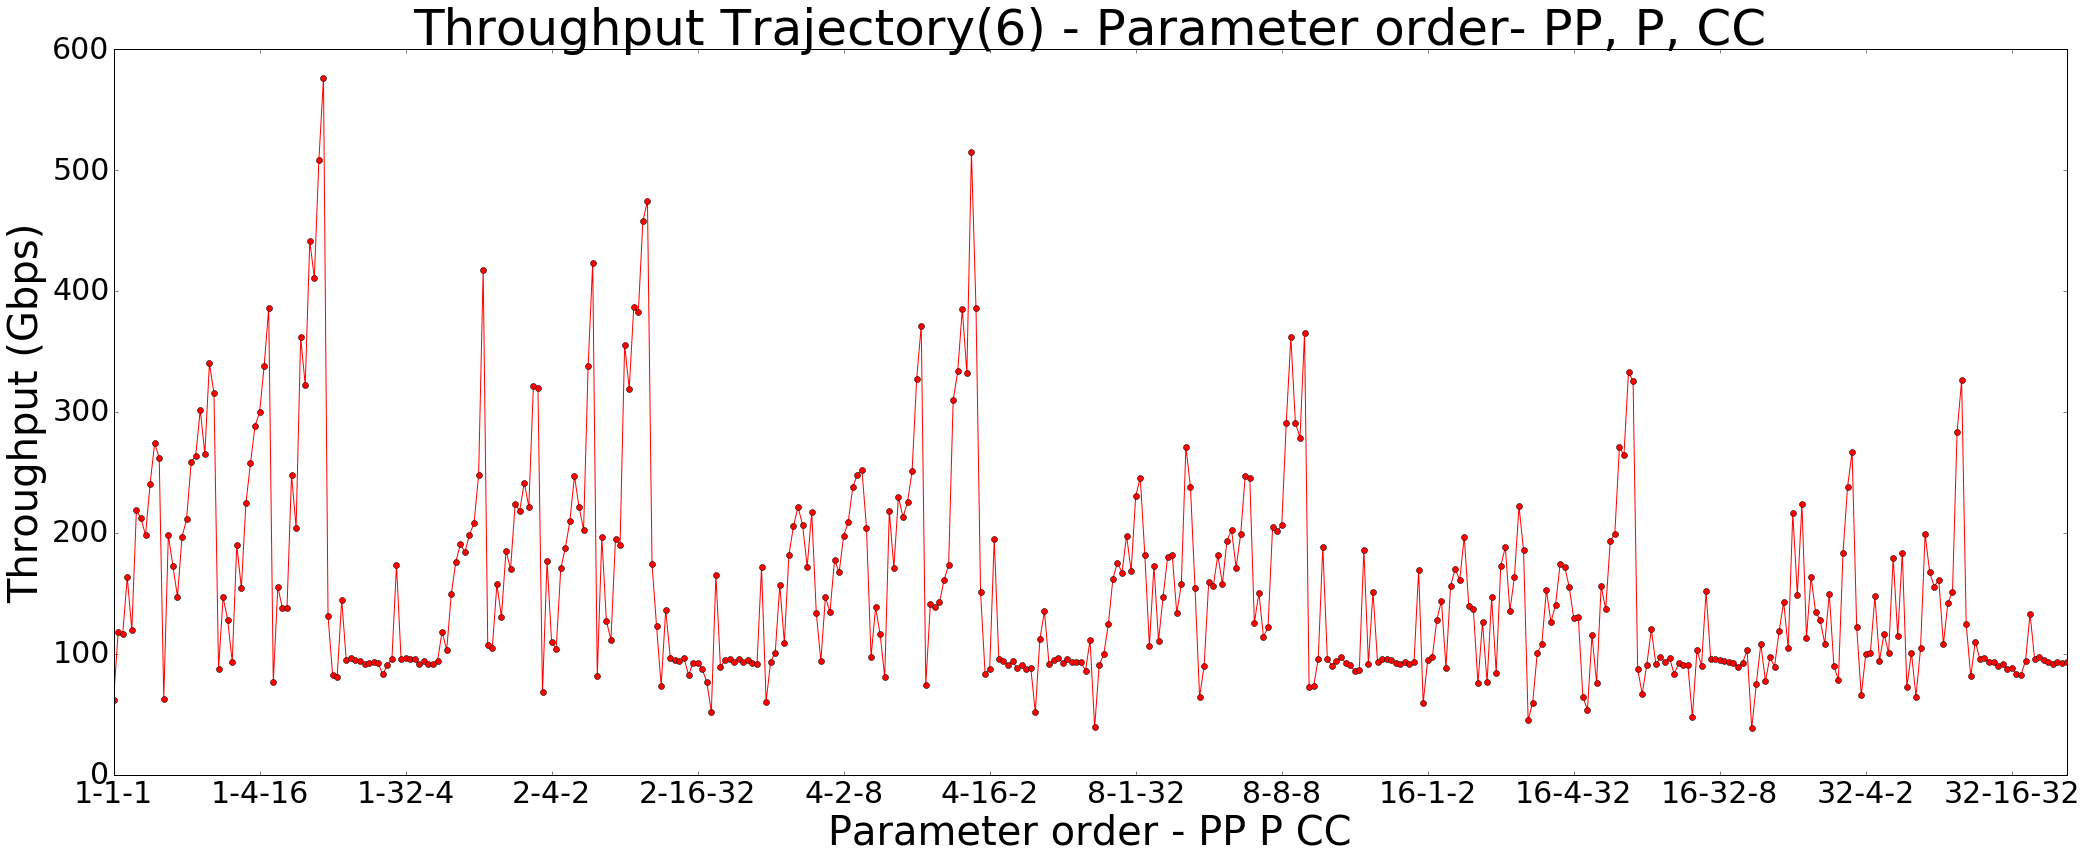

In [36]:
# Figure with lexicographical order : pp, p, cc 
run6 = run0.copy(deep=True)
run6 = run6.reset_index()
# rearrange the columns:
#column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
#                'pp', 'cc', 'p', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
#run2 = run2[column_order]
run6 = run6.sort(['pp','p','cc'])
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
                'pp', 'p', 'cc', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
run6 = run6[column_order]

# plot the graph:

run6['ticks'] = run6.pp.astype(str) + '-' + run6.p.astype(str) + '-' + run6.cc.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run6.throughput)
y_value.shape
tick_value = np.array(run6.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - PP P CC', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory(6) - Parameter order- PP, P, CC', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

# Curve smoothing for all trajectories

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  from ipykernel import kernelapp as app
/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()


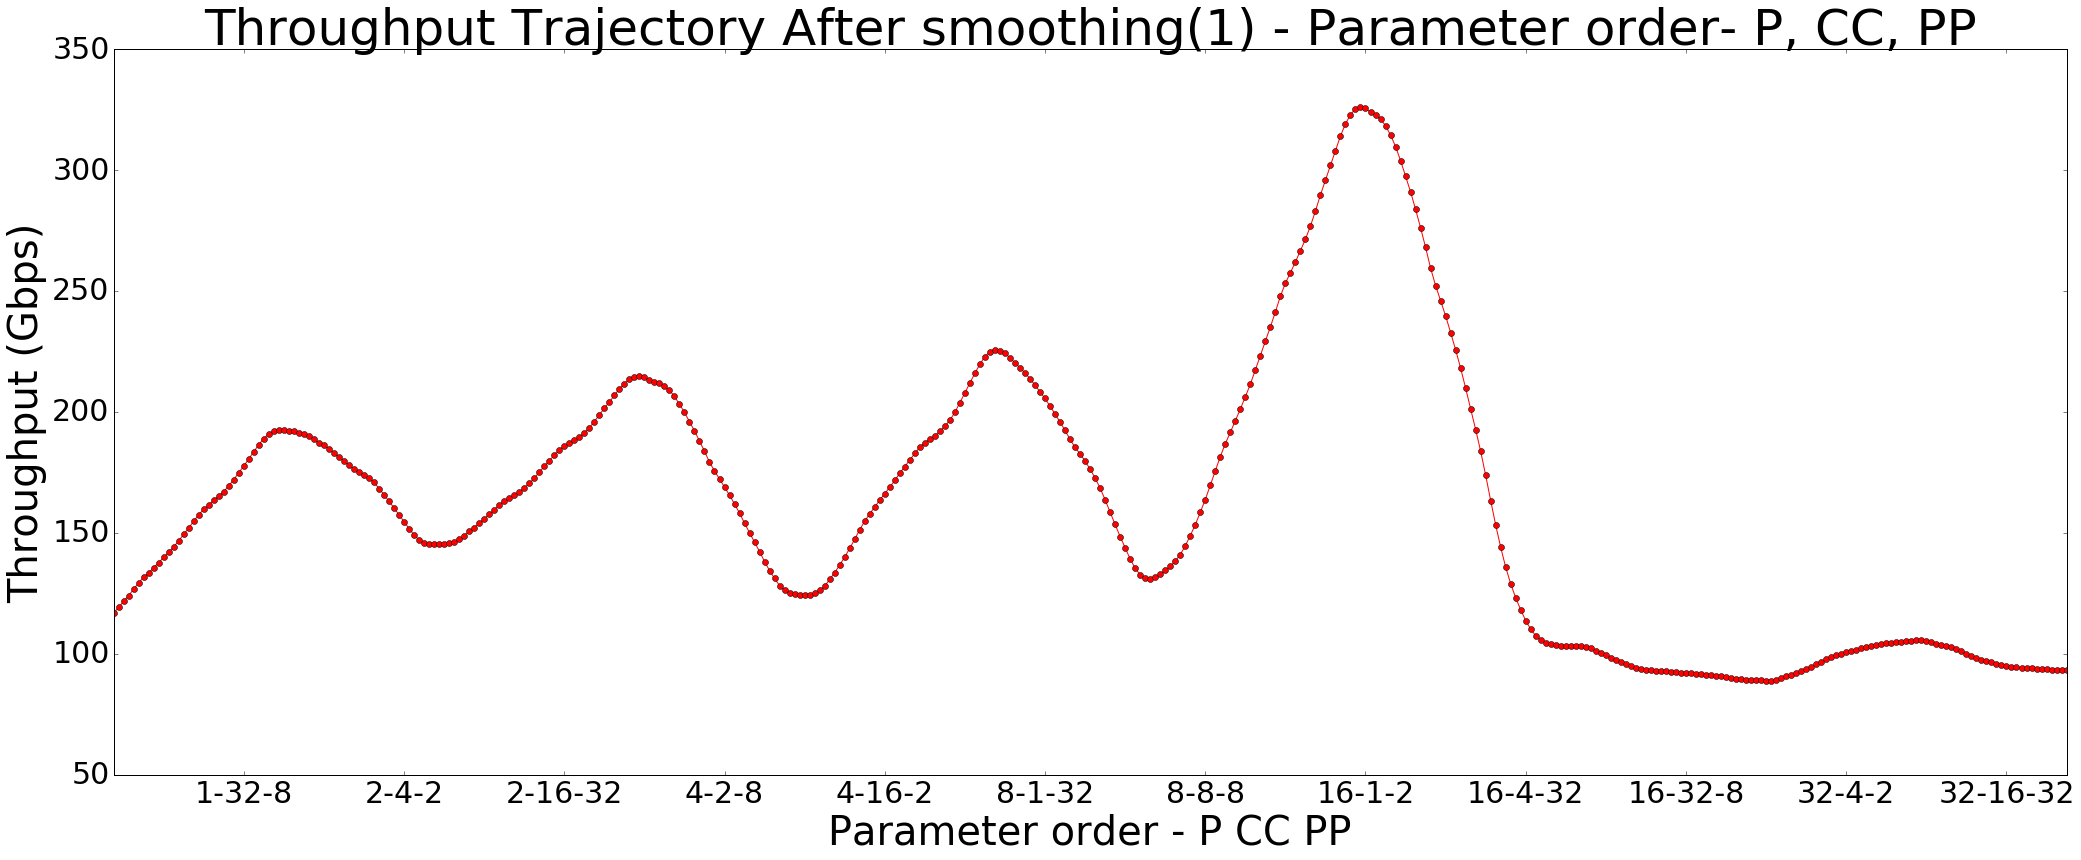

In [37]:
# running average :
run_mov = pds.rolling_mean(run1.throughput, 30)
run_mov = pds.rolling_mean(run_mov, 10)
#run_mov.plot()
# plot the graph:

run1['ticks'] = run1.p.astype(str) + '-' + run1.cc.astype(str) + '-' + run1.pp.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run_mov)
y_value.shape
tick_value = np.array(run1.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - P CC PP', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory After smoothing(1) - Parameter order- P, CC, PP', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=30).mean()
  from ipykernel import kernelapp as app
/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  app.launch_new_instance()


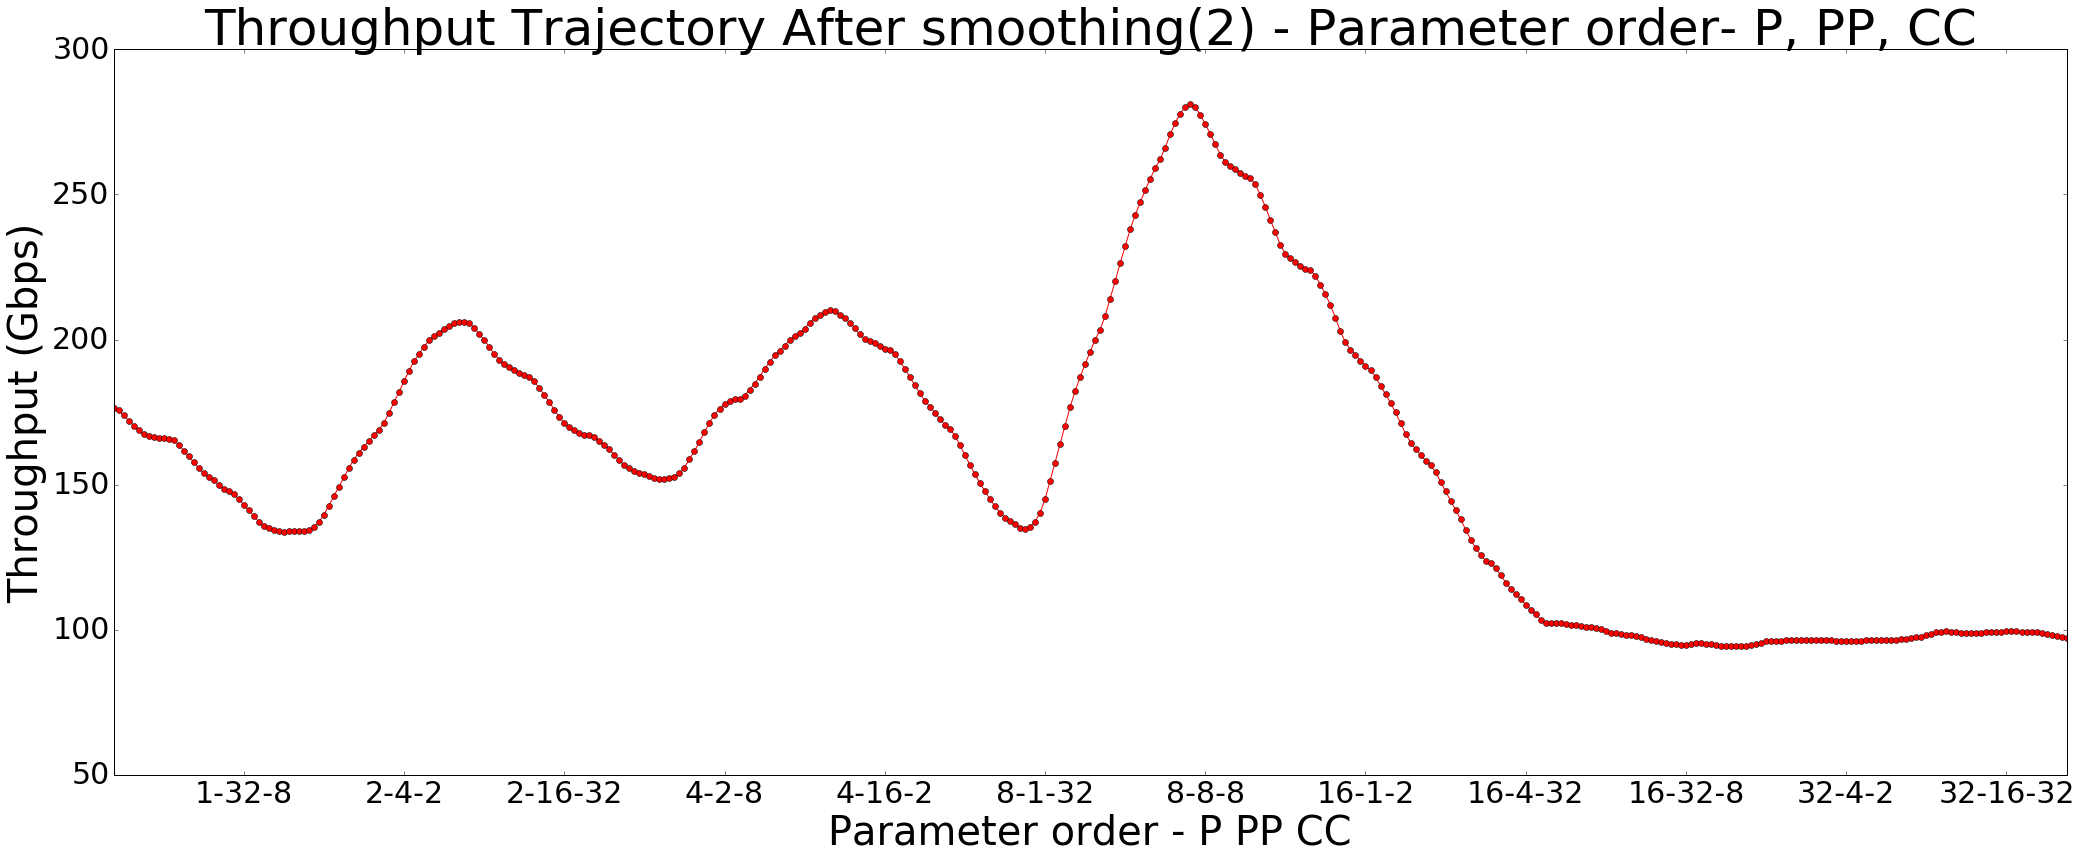

In [38]:
# running average : order p, pp, cc
run_mov = pds.rolling_mean(run2.throughput, 30)
run_mov = pds.rolling_mean(run_mov, 10)
#run_mov.plot()
# plot the graph:

run2['ticks'] = run2.p.astype(str) + '-' + run2.pp.astype(str) + '-' + run2.cc.astype(str)


x_value = np.arange(1,430)
x_value
y_value = np.array(run_mov)
y_value.shape
tick_value = np.array(run2.ticks)
plt.figure(figsize=(35,13))
plt.xlabel('Parameter order - P PP CC', fontsize=40)
plt.xticks(x_value[0:429:32], tick_value[0:429:32])
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylabel('Throughput (Gbps)', fontsize=40)
plt.title('Throughput Trajectory After smoothing(2) - Parameter order- P, PP, CC', fontsize=50)
plt.plot(x_value, y_value,'-ro',)

In [39]:
def smoothing(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = np.polyfit(x,cc,9)
    plt.plot(x,cc,'o')
    plt.plot(x,np.polyval(fitvar,x))

In [40]:
# Spline : 
def smoothing_spline(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = splrep(x,cc,s=0)
    plt.plot(x,cc,'o')
    newx = np.arange(1,length[0], 0.01)
    plt.plot(newx,splev(newx,fitvar,der=0))

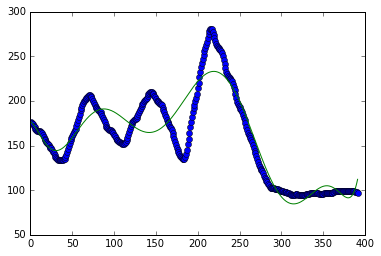

In [41]:
# moving average then poly regression run_mov
smoothing(run_mov.dropna())

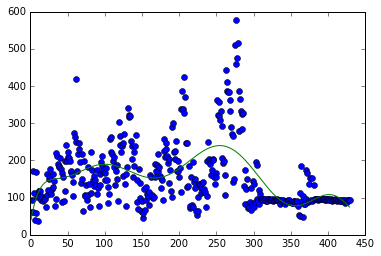

In [42]:
# run1: polynomial regression 
smoothing(run1.throughput)

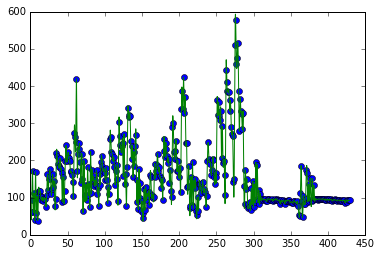

In [43]:
# cubic spline fitting
smoothing_spline(run1.throughput)

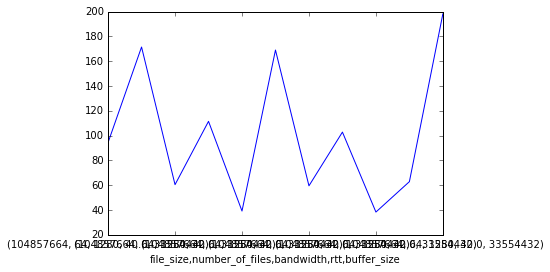

In [44]:
cc1 = run1[run1.cc == 1]
cc1_1 = cc1[1:12].throughput.plot()
#smoothing(cc1_1)

In [45]:
run1.head(5)

p  cc  pp  fast  \
file_size number_of_files bandwidth rtt  buffer_size                    
104857664 64              1280      40.0 33554432     1   1   1     0   
                                         33554432     1   1   2     1   
                                         33554432     1   1   4     1   
                                         33554432     1   1   4     0   
                                         33554432     1   1   8     1   

                                                      throughput        time  \
file_size number_of_files bandwidth rtt  buffer_size                           
104857664 64              1280      40.0 33554432      62.012022  103.205902   
                                         33554432      94.532597   67.701626   
                                         33554432     171.529367   37.311452   
                                         33554432      60.514904  105.759175   
                                         33554432     111.574671   57.360767   

                                                               start_time  \
file_size number_of_files bandwidth rtt  buffer_size                        
104857664 64              1280      40.0 33554432     2014-11-05 19:36:50   
                                         33554432     2014-11-05 19:38:33   
                                         33554432     2014-11-05 19:42:35   
                                         33554432     2014-11-05 19:43:12   
                                         33554432     2014-11-05 19:44:58   

                                                        source   destination  \
file_size number_of_files bandwidth rtt  buffer_size                           
104857664 64              1280      40.0 33554432     Stampede  Gordon/Oasis   
                                         33554432     Stampede  Gordon/Oasis   
                                         33554432     Stampede  Gordon/Oasis   
                                         33554432     Stampede  Gordon/Oasis   
                                         33554432     Stampede  Gordon/Oasis   

                                                      ticks  
file_size number_of_files bandwidth rtt  buffer_size         
104857664 64              1280      40.0 33554432     1-1-1  
                                         33554432     1-1-2  
                                         33554432     1-1-4  
                                         33554432     1-1-4  
                                         33554432     1-1-8

# Cubic Spline for fitting:

In [169]:
# moving average + spline
cc1 = run1[(run1.cc == 1) & (run1.fast == 1)]
cc1_1 = cc1[0:6].throughput

(34, 10)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


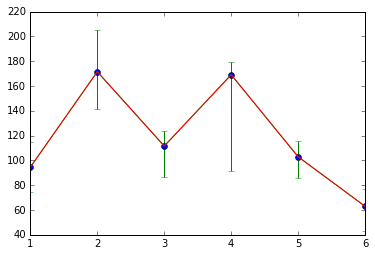

In [183]:
def smoothing_with_errorbar(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = np.polyfit(x,cc,9)
    plt.plot(x,cc,'o')
    plt.errorbar(x,cc,yerr=[[20,30,25,78,17,20],[20,34,12,10,13,14]])
    plt.plot(x,np.polyval(fitvar,x))
#cc1_mov = pds.rolling_mean(cc1_1, 2)
#smoothing_spline(cc1_mov.dropna())
smoothing_with_errorbar(cc1_1)

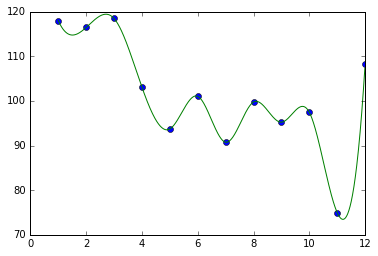

In [120]:
# Only spline
cc2 = run1[run1.cc == 2]
cc2_1 = cc2[0:12].throughput
smoothing_spline(cc2_1)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=2).mean()


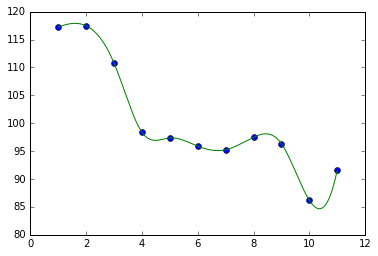

In [123]:
# Only spline
cc2 = run1[run1.cc == 2]
cc2_1 = cc2[0:12].throughput
cc2_mov = pds.rolling_mean(cc2_1, 2)
smoothing_spline(cc2_mov.dropna())
#smoothing_spline(cc2_1)

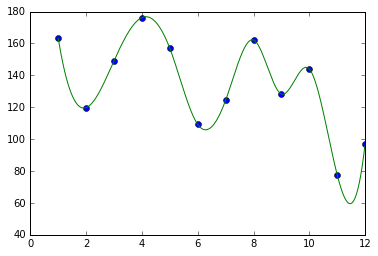

In [131]:
# Only spline
cc4 = run1[run1.cc == 4]
cc4_1 = cc4[0:12].throughput
smoothing_spline(cc4_1)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=2).mean()


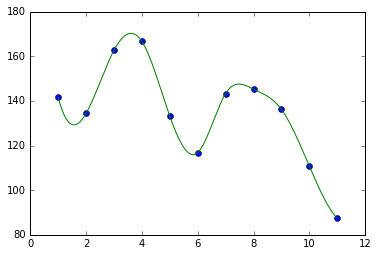

In [132]:
# Only moving avearage + spline 
cc4 = run1[run1.cc == 4]
cc4_1 = cc4[0:12].throughput
cc4_mov = pds.rolling_mean(cc4_1, 2)
smoothing_spline(cc4_mov.dropna())

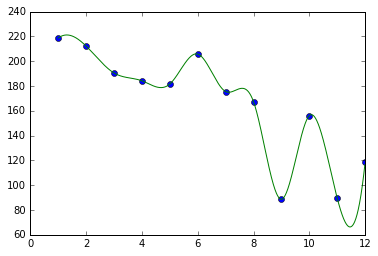

In [133]:
cc8 = run1[run1.cc == 8]
cc8_1 = cc8[0:12].throughput
smoothing_spline(cc8_1)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=2).mean()
  app.launch_new_instance()


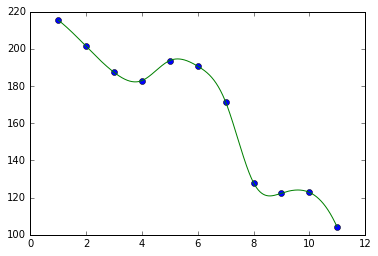

In [134]:
cc8 = run1[run1.cc == 8]
cc8_1 = cc8[0:12].throughput
cc8_mov = pds.rolling_mean(cc8_1, 2)
smoothing_spline(cc8_mov.dropna())

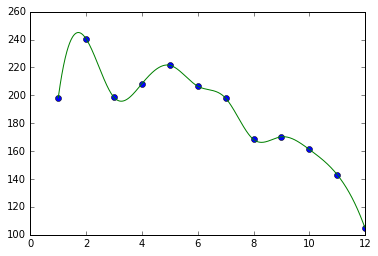

In [135]:
cc16 = run1[run1.cc == 16]
cc16_1 = cc16[0:12].throughput
smoothing_spline(cc16_1)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=2).mean()
  app.launch_new_instance()


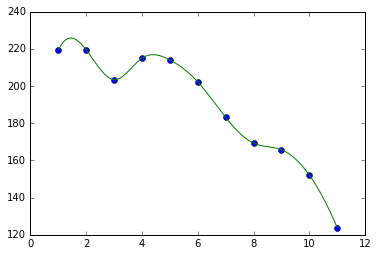

In [136]:
cc16 = run1[run1.cc == 16]
cc16_1 = cc16[0:12].throughput
cc16_mov = pds.rolling_mean(cc16_1, 2)
smoothing_spline(cc16_mov.dropna())

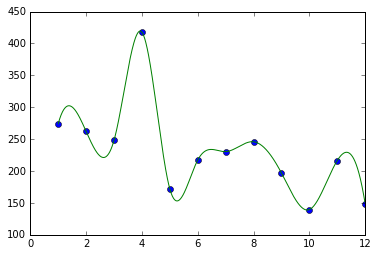

In [137]:
cc32 = run1[run1.cc == 32]
cc32_1 = cc32[0:12].throughput
smoothing_spline(cc32_1)

/Users/mds/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=2).mean()
  app.launch_new_instance()


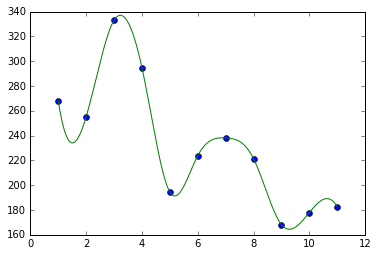

In [138]:
cc32 = run1[run1.cc == 32]
cc32_1 = cc32[0:12].throughput
cc32_mov = pds.rolling_mean(cc32_1, 2)
smoothing_spline(cc32_mov.dropna())

# 

(12,)

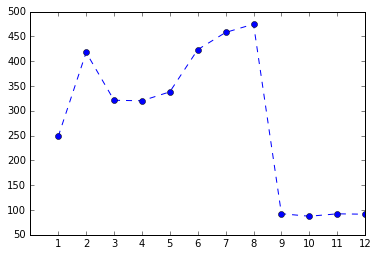

In [58]:

# find all p for which cc = 32 and pp = 2
p_value = run1[(run1.cc==32) & (run1.pp==2)]
x_value = np.arange(1,13)
y_value = np.array(p_value.throughput)
x_ticks = np.arange(1,33)
plt.plot(x_value, y_value, '--bo')
plt.xticks(x_value, x_ticks)
y_value.shape

In [ ]:
def smoothing_custom(cc):
    length = cc.shape
    p = list(range(1,length[0]+1))
    x = np.array(p)
    fitvar = splrep(x,cc,s=0)
    plt.plot(x,cc,'o')
    tick_value = np.arange(1,33)
    newx = np.arange(1,length[0], 0.01)
    plt.plot(newx,splev(newx,fitvar,der=0))
    #plt.xticks(x[1:12:1],tick_value[1:32:4])
pp_opt = p_value.throughput
#cc32_mov1 = pds.rolling_mean(pp_opt, 2)
#cc32_mov = pds.rolling_mean(cc32_mov1, 2)
smoothing_custom(pp_opt.dropna())

In [ ]:
p_value

In [ ]:
run1.sort(['throughput']).tail()

In [ ]:
def find_max_bitonic(ary):
    def recurse(low, high):
        mid = int(low + (high - low) / 2)
        # Handle base cases first.
        if (high - low == 1):
            return high

        if (ary[mid] < ary[mid+1]):
            return recurse(mid, high) # Go right.
        else:
            return recurse(low, mid)
    return recurse(0, len(ary) - 1)


    



In [ ]:
ary = (50,500, 45, 20, 10, 4)
plt.plot(ary)
maximum = find_max_bitonic(ary)
maximum

# 3D plot for cc and pp

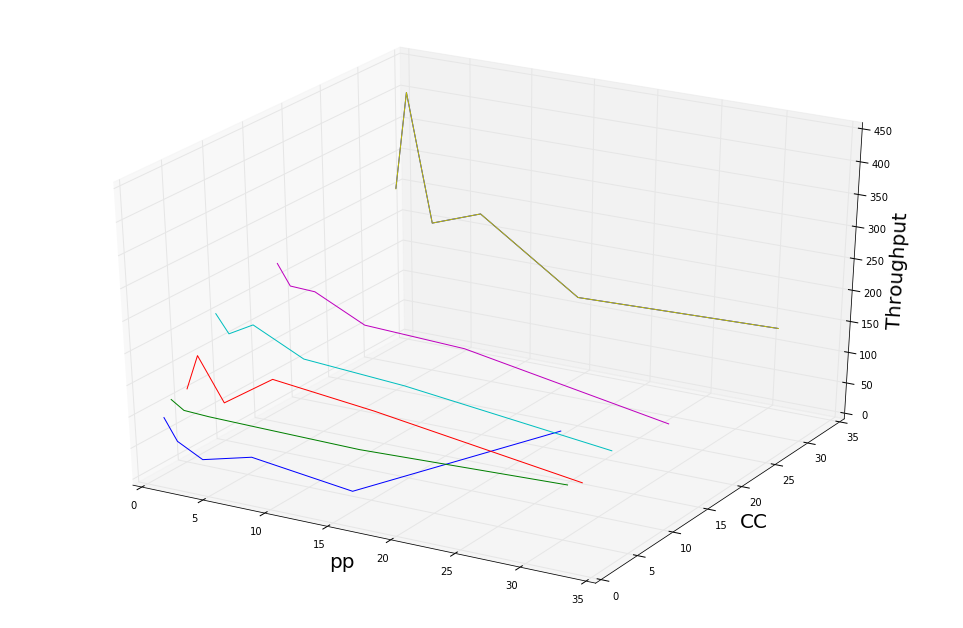

In [148]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

#plt.figure(figsize=(35,13))
fig = plt.figure(figsize=(17,11))
ax = fig.gca(projection='3d')
pipe = np.array([1,2,4,8,16,32])
conc = np.array([1,1,1,1,1,1])
ths = np.array(cc1_1[1:12:2])
#theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
#z = np.linspace(-2, 2, 100)
#r = z**2 + 1
#x = r * np.sin(theta)
#y = r * np.cos(theta)
ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([2,2,2,2,2,2])
ths = np.array(cc2_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([4,4,4,4,4,4])
ths = np.array(cc4_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([8,8,8,8,8,8])
ths = np.array(cc8_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([16,16,16,16,16,16])
ths = np.array(cc16_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

pipe = np.array([1,2,4,8,16,32])
conc = np.array([32,32,32,32,32,32])
ths = np.array(cc32_1[1:12:2])

ax.plot(pipe, conc, ths, label='parametric curve')

ax.plot_wireframe(pipe, conc, ths, rstride=1, cstride=1)
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
#ax.legend()
ax.set_xlabel('pp',fontsize=20)
ax.set_ylabel('CC',fontsize=20)
ax.set_zlabel('Throughput',fontsize=20)
plt.show()

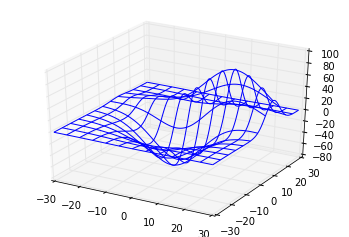

In [142]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [149]:
X

array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       ..., 
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]])

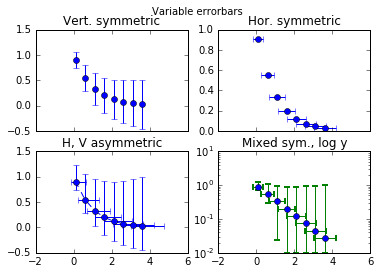

In [157]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
#plt.errorbar(x, y, xerr=0.2, yerr=0.4)
#plt.title("Simplest errorbars, 0.2 in x, 0.4 in y")

# Now switch to a more OO interface to exercise more features.
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
ax = axs[0,0]
ax.errorbar(x, y, yerr=yerr, fmt='o')
ax.set_title('Vert. symmetric')

# With 4 subplots, reduce the number of axis ticks to avoid crowding.
ax.locator_params(nbins=4)

ax = axs[0,1]
ax.errorbar(x, y, xerr=xerr, fmt='o')
ax.set_title('Hor. symmetric')

ax = axs[1,0]
ax.errorbar(x, y, yerr=[yerr, 2*yerr], xerr=[xerr, 2*xerr], fmt='--o')
ax.set_title('H, V asymmetric')

ax = axs[1,1]
ax.set_yscale('log')
# Here we have to be careful to keep all y values positive:
ylower = np.maximum(1e-2, y - yerr)
yerr_lower = y - ylower

ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)
ax.set_title('Mixed sym., log y')

fig.suptitle('Variable errorbars')

plt.show()

In [173]:
yerr=[yerr_lower, 2*yerr]
yerr

[array([ 0.16324555,  0.25491933,  0.30976177,  0.19189652,  0.11245643,
         0.06427358,  0.0350492 ,  0.01732372]),
 [array([ 0.16324555,  0.25491933,  0.30976177,  0.19189652,  0.11245643,
          0.06427358,  0.0350492 ,  0.01732372]),
  array([ 0.32649111,  0.50983867,  0.61952354,  0.70596443,  0.77965507,
          0.84498062,  0.90427267,  0.95894664]),
  array([ 0.16324555,  0.25491933,  0.30976177,  0.19189652,  0.11245643,
          0.06427358,  0.0350492 ,  0.01732372]),
  array([ 0.32649111,  0.50983867,  0.61952354,  0.70596443,  0.77965507,
          0.84498062,  0.90427267,  0.95894664])]]

#  Manually analyze the large file transfers:

In [ ]:
# copy main data into a temporary variable :
temp_data = data.copy(deep=True)
temp_data.head()

In [ ]:
# get the unique source and destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
source_name = temp_data[['source']]
droped_duplicate_sources = source_name.drop_duplicates()

unique_sources = [tuple(sources) for sources in droped_duplicate_sources.values]
unique_sources

In [ ]:
# get the unique destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
destination_name = temp_data[['destination']]
droped_duplicate_destinations = destination_name.drop_duplicates()

unique_destination = [tuple(destinations) for destinations in droped_duplicate_destinations.values]
unique_destination

In [ ]:
# get the unique destination names : as tuple 
#transfer_requests = data[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
source_destination_name = temp_data[['source','destination']]
droped_duplicate_sources_destinations = source_destination_name.drop_duplicates()

unique_sources_destination = [tuple(sources_destinations) for sources_destinations in droped_duplicate_sources_destinations.values]
unique_sources_destination

In [ ]:
# filter data based on source and destination tuple:
# set source and destination as index:
r = temp_data.set_index(['source','destination'])
r.head()

In [ ]:
# Get the data with source = Stampede and destination = Gordon or Gordon/Oasis
part_1 = r.loc[('Stampede', 'Gordon/Oasis')]
#part_2 = r.loc[('Stampede', 'Gordon/oasis')]
#part_3 = r.loc[('Stampede', 'Gordon')]
# concatanate all three :
stampede_gordon = pds.concat([part_1], axis=0)
stampede_gordon.head()

In [ ]:
# reset the index:
stampede_gordon = stampede_gordon.reset_index(['source','destination'])
# reordering the columns inside the dataframe:
column_order = ['file_size', 'number_of_files', 'bandwidth', 'rtt', 'buffer_size', 
            'p', 'cc', 'pp', 'fast', 'throughput', 'time', 'start_time', 'source', 'destination']
stampede_gordon = stampede_gordon[column_order]
stampede_gordon.head()

# small file analysis: 

In [ ]:
# get the logs with filesize in between 50MB and 250MB. 
filesize_filter_small = ((stampede_gordon.file_size.astype(int) <= (40*1000*1000))  )
small_st_gordon = stampede_gordon[filesize_filter_small]
small_st_gordon.head()

In [ ]:
# get the unique transfers : 
# get the unique transfers : as tuple 
transfer_requests = small_st_gordon[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers_small = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers_small

In [ ]:
# set request param as index:
r_small = small_st_gordon.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r_small.head()

In [ ]:
# same operations for 50MB with 999 files dataset:
l_50MB_999 = r_small.loc[('5242941', '999', '1280', '39.0', '49920000')]
l_50MB_999 = l_50MB_999[l_50MB_999.p*l_50MB_999.cc <= 14]
p_50MB_999 = l_50MB_999.sort_values('throughput')
p_50MB_999.tail(25)

In [ ]:
p_50MB_999[(p_50MB_999.p==4) & (p_50MB_999.cc==2) & (p_50MB_999.pp == 8)]

In [ ]:
# same operations for 25MB with 200 files dataset:
l_25MB_200 = r_small.loc[('26214461', '200', '1280', '40.0', '33554432')]
l_25MB_200 = l_25MB_200[l_25MB_200.p*l_25MB_200.cc <= 16]
p_25MB_200 = l_25MB_200.sort_values('throughput')
p_25MB_200.tail(25)

In [ ]:
p_25MB_200[(p_25MB_200.p==4) & (p_25MB_200.cc==2) & (p_25MB_200.pp == 8)]

In [ ]:
p_25MB_200[(p_25MB_200.p==1) & (p_25MB_200.cc==8) & (p_25MB_200.pp == 32)]

In [ ]:
# same operations for 100MB with 299 files dataset:
l_512KB = r_small.loc[('5242929', '1000', '1280', '40.0', '33554432')]
l_512KB = l_512KB[l_512KB.p*l_512KB.cc <= 8]
p_512KB = l_512KB.sort_values('throughput')
p_512KB.tail(25)

In [ ]:
p_512KB[(p_512KB.p==2) & (p_512KB.cc==2) & (p_512KB.pp == 16)]

# Medium file analysis:

In [ ]:
# get the logs with filesize in between 50MB and 250MB. 
filesize_filter_medium = ((stampede_gordon.file_size.astype(int) <= (200*1000*1000)) & ( stampede_gordon.file_size.astype(int) >= (45*1000*1000) ) )
medium_st_gordon = stampede_gordon[filesize_filter_medium]
medium_st_gordon.head()

In [ ]:
# get the unique transfers : 
# get the unique transfers : as tuple 
transfer_requests = medium_st_gordon[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers_medium = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers_medium

In [ ]:
# set request param as index:
r_medium = medium_st_gordon.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r_medium.head()

In [ ]:
# same operations for 100MB with 69 files dataset:
l_100MB_69 = r_medium.loc[('104857659', '69', '1280', '39.0', '49920000')]
l_100MB_69 = l_100MB_69[l_100MB_69.p*l_100MB_69.cc <= 16]
p_100MB_69 = l_100MB_69.sort_values('throughput')
p_100MB_69.tail(25)

In [ ]:
# same operations for 130MB with 329 files dataset:
l_130MB_329 = r_medium.loc[('130884019', '329', '1280', '40.0', '33554432')]
l_130MB_329 = l_130MB_329[l_130MB_329.p*l_130MB_329.cc <= 16]
p_130MB_329 = l_130MB_329.sort_values('throughput')
p_130MB_329.tail(25)

In [ ]:
p_130MB_329[(p_130MB_329.p==4) & (p_130MB_329.cc==2) & (p_130MB_329.pp == 8)]

In [ ]:
# same operations for 100MB with 299 files dataset:
l_100MB_299 = r_medium.loc[('104857668', '299', '1280', '39.0', '49920000')]
l_100MB_299 = l_100MB_299[l_100MB_299.p*l_100MB_299.cc <= 16]
p_100MB_299 = l_100MB_299.sort_values('throughput')
p_100MB_299.tail(25)

In [ ]:
p_100MB_299[(p_100MB_299.p==4) & (p_100MB_299.cc==2) & (p_100MB_299.pp == 8)]

In [ ]:
# same operations for 100MB dataset:
l_100MB = r_medium.loc[('104857664', '64', '1280', '40.0', '33554432')]
l_100MB = l_100MB[l_100MB.p*l_100MB.cc <= 16]
p_100MB = l_100MB.sort_values('throughput')
p_100MB.tail(25)

In [ ]:
p_100MB[(p_100MB.p==4) & (p_100MB.cc==2) & (p_100MB.pp == 8)]

# Large file analysis:

In [ ]:
# get the logs with filesize greater than 250MB. 
filesize_filter = (stampede_gordon.file_size.astype(int) > (200*1000*1000) )
large_st_gordon = stampede_gordon[filesize_filter]
large_st_gordon.head()

In [ ]:
# get the unique transfers : 
# get the unique transfers : as tuple 
transfer_requests = large_st_gordon[['file_size','number_of_files','bandwidth','rtt','buffer_size']]
droped_duplicate_trans_req = transfer_requests.drop_duplicates()

unique_transfers = [tuple(transfers) for transfers in droped_duplicate_trans_req.values]
unique_transfers

In [ ]:
# set request param as index:
r = large_st_gordon.set_index(['file_size','number_of_files','bandwidth','rtt','buffer_size'])
r.head()

In [ ]:
# get the values 20 streams:
l = r.loc[('1073742080', '16', '1280', '40.0', '33554432')]
l = l[l.p*l.cc <= 20]
l.head()

In [ ]:
p1 = l.sort_values('throughput')
p1.tail(25)

In [ ]:
# find throughput for globus online:
p1[(p1.p==8) & (p1.cc==2) & (p1.pp == 4)]

In [ ]:
# same operations for 3GB dataset:
l_3GB = r.loc[('3221225984', '8', '1280', '40.0', '33554432')]
l_3GB = l_3GB[l_3GB.p*l_3GB.cc <= 20]
p_3GB = l_3GB.sort_values('throughput')
p_3GB.tail(25)

In [ ]:
# find throughput for globus online:
p_3GB[(p_3GB.p==8) & (p_3GB.cc==2) & (p_3GB.pp == 4)]

In [ ]:
# same operations for 3GB dataset:
l_200MB = r.loc[('209715259', '69', '1280', '39.0', '49920000')]
l_200MB = l_200MB[l_200MB.p*l_200MB.cc <= 20]
p_200MB = l_200MB.sort_values('throughput')
p_200MB.tail(25)

In [ ]:
# find throughput for globus online:
p_200MB[(p_200MB.p==8) & (p_200MB.cc==2) & (p_200MB.pp == 4)]

In [ ]:

# same operations for 2GB dataset:
l_2GB = r.loc[('2873838531', '34', '1280', '40.0', '33554432')]
l_2GB = l_2GB[l_2GB.p*l_2GB.cc <= 20]
p_2GB = l_2GB.sort_values('throughput')
p_2GB.tail(25)

In [ ]:
# find throughput for globus online:
p_2GB[(p_2GB.p==8) & (p_2GB.cc==2) & (p_2GB.pp == 4)]

# clustering data based on file requests:

In [ ]:
# importing libraries:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [ ]:
# some setting for this notebook to actually show the graphs inline, you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [ ]:
# get the data:
unique_transfers[0:5]
# preprocessing : 
# normalization: all columns between 1 to 100: (x - x_min) / (x_max - x_min)

file_size_min = data.file_size.min() 
file_size_max = data.file_size.max()
number_of_files_min = data.number_of_files.min()
number_of_files_max = data.number_of_files.max()
bandwidth_max = data.bandwidth.max()
bandwidth_min = data.bandwidth.min()
rtt_min = data.rtt.min()
rtt_max = data.rtt.max()
buffer_size_min = data.buffer_size.min()
buffer_size_max = data.buffer_size.max()

unique_transfers[0:5]

droped_duplicate_trans_req.head()
#droped_duplicate_trans_req.file_size = (droped_duplicate_trans_req.file_size - file_size_min) / (file_size_max -file_size_min)
#droped_duplicate_trans_req.head()
ndarry_data_req = droped_duplicate_trans_req.as_matrix()


In [ ]:
# generate the linkage matrix
# we are using Ward variance minimization algorithm.
# link: https://en.wikipedia.org/wiki/Ward%27s_method
Z = linkage(ndarry_data_req, 'ward')  
Z.shape

In [ ]:
# computing cophenetic correlation coefficient
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(ndarry_data_req))
c

In [ ]:

# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.show()

In [ ]:
# truncating the dendrogram: 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()